### Notebook that defines the driver degrons to be used in the excess analysis:
CONDITIONS:
- We considered a driver degron if it founds significant by two signals of positive selection (Q-VALUE <= 0.25)


In [2]:
import os 
import pandas as pd
import numpy as np
pd.options.display.max_columns=100

In [3]:
# base
base="/workspace/projects/ubiquitins/codereview/degradation/" 
# Degrons
output_combined_information = os.path.join(base,"data","table_positive_selection.tsv.gz")
# De-novo
path_output_denovo = os.path.join(base,"data","smdeg_degrons_denovo_tcga_penta.tsv")
# output files
path_output_drivers_strict_tcga = os.path.join(base,"data","list_drivers_degrons_strict_tcga.txt")
path_output_drivers_strict_ccle = os.path.join(base,"data","list_drivers_degrons_strict_ccle.txt")
path_output_drivers_strict_both = os.path.join(base,"data","list_drivers_degrons_strict_both.txt")

path_output_plots = os.path.join(base,"plots","Figure5")

In [4]:
# drivers degron 
df_degron_drivers = pd.read_csv(output_combined_information,sep="\t")
df_degron_drivers_tcga=df_degron_drivers[((df_degron_drivers["nearly_significant_FM_TCGA"])&(df_degron_drivers["Q_VALUE_SIM_TCGA"]<=0.25))|(df_degron_drivers["significant_FM_TCGA"])]
# De novo
df_denovo_sm = pd.read_csv(path_output_denovo,sep="\t")
df_denovo_sm=df_denovo_sm[df_denovo_sm["significant_SM"]]
# cgc
df_cgc = pd.read_csv(os.path.join(base,"external","CancerGeneCensus.tsv"),sep="\t")
genes_cgc = set(df_cgc["Gene Symbol"])

In [5]:
df_denovo_sm.rename(columns={"HUGO_SYMBOL":"Hugo_Symbol"},inplace=True)

In [7]:
df_drivers_tcga = pd.concat([df_degron_drivers_tcga,df_denovo_sm],sort=True)
x=df_drivers_tcga.groupby(["Hugo_Symbol","Entry_Isoform","DEGRON","START","END"],as_index=False).agg({"nearly_significant_FM_TCGA":np.any,"significant_FM_TCGA":np.any,"significant_SM_TCGA":np.any,"significant_SM":np.any})
x["CGC"] = x.apply(lambda row: row["Hugo_Symbol"] in genes_cgc,axis=1)
x[["Hugo_Symbol","Entry_Isoform","DEGRON","START","END","nearly_significant_FM_TCGA","significant_FM_TCGA","significant_SM_TCGA","significant_SM","CGC"]].drop_duplicates().to_csv(os.path.join(base,"data","driver_degrons_tcga.tsv"),sep="\t",index=False)

### Number of driver degrons TCGA

In [9]:
df_degron_drivers_tcga[["DEGRON","START","END","Entry_Isoform"]].drop_duplicates().shape

(23, 4)

### Number of genes driver in TCGA (two signals)

In [10]:
genes_driver_degron_tcga = list(df_degron_drivers_tcga["Hugo_Symbol"].unique()) + list(df_denovo_sm["HUGO_SYMBOL"].unique())

In [11]:
genes_driver_degron_tcga

['MYC',
 'MYCN',
 'TP53',
 'CCND1',
 'NOTCH2',
 'DDR1',
 'TP53BP1',
 'MMRN1',
 'DCBLD2',
 'EPAS1',
 'TRIOBP',
 'ZNF331',
 'SALL4',
 'EIF3H',
 'PCF11',
 'SLITRK5',
 'CTNNB1',
 'SERTAD2',
 'NFE2L2',
 'FAM135B',
 'PAG1',
 'NPAP1',
 'ARAF',
 'MAPK1',
 'NRG1',
 'PIK3R1']

### Generate a file with the driver degrons. The number of appearances correlates with the number of mutations in TCGA

In [12]:
path_output_drivers_strict_tcga

'/workspace/projects/ubiquitins/codereview/degradation/data/list_drivers_degrons_strict_tcga.txt'

In [13]:
f = open(path_output_drivers_strict_tcga,'w')
for gene in genes_driver_degron_tcga:
    if gene in df_denovo_sm["HUGO_SYMBOL"].unique():
        total = int(np.nanmax(df_denovo_sm[(df_denovo_sm["HUGO_SYMBOL"]==gene)]["log_pvalue_sm"].values))+10
        #print (total)
    else:
        total = int(-np.log(np.nanmin(df_degron_drivers[(df_degron_drivers["Hugo_Symbol"]==gene)]["Q_VALUE_SIM_TCGA"].values))+10)
    print (gene,total)
    for x in range(0,total):
        
        f.write(gene+"\t")
    f.write("\n")
f.close()

MYC 12
MYCN 22
TP53 135
CCND1 34
NOTCH2 10
DDR1 14
TP53BP1 15
MMRN1 16
DCBLD2 13
EPAS1 31
TRIOBP 11
ZNF331 13
SALL4 12
EIF3H 10
PCF11 58
SLITRK5 14
CTNNB1 628
SERTAD2 10
NFE2L2 183
FAM135B 13
PAG1 14
NPAP1 12
ARAF 13
MAPK1 23
NRG1 13
PIK3R1 24


### Similar for  CCLE

In [8]:
df_degron_drivers_ccle=df_degron_drivers[((df_degron_drivers["nearly_significant_FM_CCLE"])&(df_degron_drivers["Q_VALUE_SIM_CCLE"]<=0.25))|(df_degron_drivers["significant_FM_CCLE"])]

In [9]:
df_degron_drivers_ccle["CGC"] = df_degron_drivers_ccle.apply(lambda row: row["Hugo_Symbol"] in genes_cgc,axis=1)
df_degron_drivers_ccle.sort_values("Q_VALUE_SIM_CCLE").to_csv(os.path.join(base,"data","driver_degrons_CCLE.tsv"),sep="\t",index=False)

/home/fran/Downloads/yes/envs/regression/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### Number of total drivers degrons

In [15]:
df_degron_drivers_ccle[["DEGRON","START","END","Entry_Isoform"]].drop_duplicates().shape

(13, 4)

In [16]:
genes_driver_degron_ccle = list(df_degron_drivers_ccle["Hugo_Symbol"].unique()) 

In [17]:
genes_driver_degron_ccle

['CCND1',
 'CCND3',
 'ZSCAN1',
 'IRF2BPL',
 'C2orf71',
 'CTNNB1',
 'AHNAK',
 'NFE2L2',
 'TPD52L1',
 'XAF1',
 'ZC3H7A',
 'USP36']

### Combine both

In [20]:
total_genes = set(genes_driver_degron_ccle).union(set(genes_driver_degron_tcga))

In [21]:
len(total_genes)

35

In [22]:
total_genes

{'AHNAK',
 'ARAF',
 'C2orf71',
 'CCND1',
 'CCND3',
 'CTNNB1',
 'DCBLD2',
 'DDR1',
 'EIF3H',
 'EPAS1',
 'FAM135B',
 'IRF2BPL',
 'MAPK1',
 'MMRN1',
 'MYC',
 'MYCN',
 'NFE2L2',
 'NOTCH2',
 'NPAP1',
 'NRG1',
 'PAG1',
 'PCF11',
 'PIK3R1',
 'SALL4',
 'SERTAD2',
 'SLITRK5',
 'TP53',
 'TP53BP1',
 'TPD52L1',
 'TRIOBP',
 'USP36',
 'XAF1',
 'ZC3H7A',
 'ZNF331',
 'ZSCAN1'}

### Make barplot of CCLE, TCGA and BOTH with cancer gene census

In [128]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection
import statsmodels.stats.multitest as mt


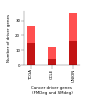

In [149]:
df_cgc = pd.read_csv(os.path.join(base,"external","CancerGeneCensus.tsv"),sep="\t")
genes_cgc = set(df_cgc["Gene Symbol"])
# CGC
n_tcga_cgc = len(set(genes_driver_degron_tcga).intersection(genes_cgc))
n_ccle_cgc = len(set(genes_driver_degron_ccle).intersection(genes_cgc))
n_total_cgc = len(set(total_genes).intersection(genes_cgc))
# No CGC
n_tcga_new = len(set(genes_driver_degron_tcga)  - (genes_cgc))
n_ccle_new = len(set(genes_driver_degron_ccle) - (genes_cgc))
n_total_new = len(set(total_genes) - (genes_cgc))

fig,ax = plt.subplots(figsize=(1,1))
ax.bar(x=[0],height=[n_tcga_new+n_tcga_cgc],width=0.4,color="#FF5050")
ax.bar(x=[0],height=[n_tcga_cgc],width=0.4,color="#C31414")

ax.bar(x=[1],height=[n_ccle_cgc+n_ccle_new],width=0.4,color="#FF5050")
ax.bar(x=[1],height=[n_ccle_cgc],width=0.4,color="#C31414")

ax.bar(x=[2],height=[n_total_new+n_total_cgc],width=0.4,color="#FF5050")
ax.bar(x=[2],height=[n_total_cgc],width=0.4,color="#C31414")

ax.set_xticks([0,1,2])
ax.set_xticklabels(["TCGA","CCLE","UNION"],rotation=90,fontsize=4)
ax.set_ylabel("Number of driver genes",fontsize=4)
ax.set_xlabel("Cancer driver genes \n(FMDeg and SMdeg)",fontsize=4)

ax.tick_params(axis = 'y', labelsize =4  , pad=0.5 ,width=0.25)
ax.tick_params(axis = 'x', labelsize =4  , pad=0.5 ,width=0.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.25)
ax.spines['bottom'].set_linewidth(0.25)
plt.savefig(path_output_plots+'/barplot_driver_genes_degron.pdf', dpi=100,bbox_inches="tight")

In [139]:
n_total_cgc

16

### Is there any overlap between degrons and E3 ligases? 

In [25]:
def read_file(filein):
    f = open(filein,'r')
    s = set()
    for line in f.readlines():
        line = line.strip()
        s.add(line)
    f.close()
    return s
ubs = set(read_file(os.path.join(base,"internal","curated_ub_du.lst")))


In [27]:
ubs.intersection(genes_driver_degron_tcga)

set()